Notebook for characterizning roughly Gaussian beams

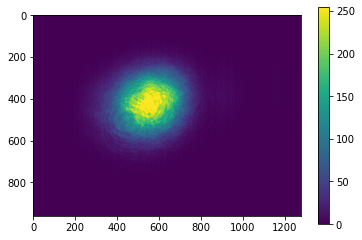

In [28]:
# Import libraries
from PIL import Image
import os
import numpy
import matplotlib.pyplot as plt
import scipy.optimize as opt
import numpy as np
import pylab as plt


#Define the 1DGaussian function
def gauss(x, H, A, x0, sigma):
    return H + A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

#Define 2Dfit function
def twoD_Gaussian(xdata_tuple, amplitude, xo, yo, sigma_x, sigma_y, offset):
    (x, y) = xdata_tuple                                                        
    xo = float(xo)                                                              
    yo = float(yo)                                                              
    a = 1/(2*sigma_x**2)      
    c = 1/(2*sigma_y**2)   
    g = offset + amplitude*np.exp( - (a*((x-xo)**2) + c*((y-yo)**2)))      
                                  
    return g.ravel()


#Import image
file_location = "C:\\Users\\erlid\\OneDrive\\Documents\\GitHub\\image-processing\\beam-profiling\\401nm_7.19.22"
im_name=os.path.join(file_location, "location1_low_power.bmp")
img= Image.open(im_name)
np_img = numpy.array(img)

data=np_img[:,:,0]

# Create x and y indices
x0 = np.linspace(0, np.shape(data)[0], np.shape(data)[0])
y0 = np.linspace(0, np.shape(data)[1], np.shape(data)[1])
x, y = np.meshgrid(x0, y0,indexing='ij')

# plot
plt.figure()
plt.imshow(data)
plt.colorbar();

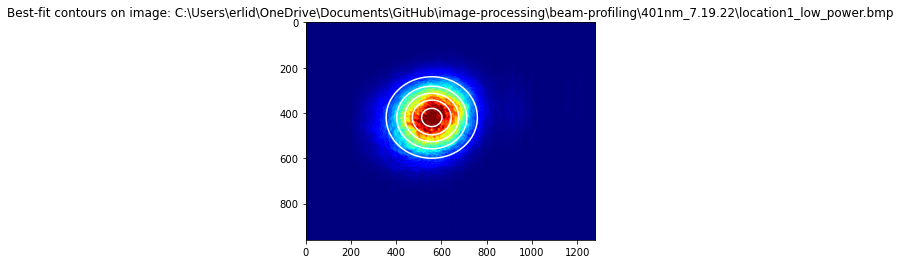

BEAM PARAMETERS
Amplitude: 271.887
X0: 419.73
Y0: 557.232
sigma_x: 97.609
sigma_y: 109.3
Offset: 0.228


In [30]:
# Fit data

#amplitude, xo, yo, sigma_x, sigma_y, offset
initial_guess = (250,300,700,100,100,20)

popt, pcov = opt.curve_fit(twoD_Gaussian, (x, y), np.ravel(data), p0=initial_guess)

# plot fit

data_fitted = twoD_Gaussian((x, y), *popt)

fig, ax = plt.subplots(1, 1)
ax.imshow(data, cmap=plt.cm.jet)
ax.contour(y, x, data_fitted.reshape(np.shape(data)[0], np.shape(data)[1]), 5, colors='w')
plt.title('Best-fit contours on image: '+im_name)
plt.show();

print('BEAM PARAMETERS')
print('Amplitude:',round(popt[0],3)) #convert to instensity/power
print('X0:',round(popt[1],3))
print('Y0:',round(popt[2],3))
print('sigma_x:',round(popt[3],3)) #convert to waist
print('sigma_y:',round(popt[4],3))
print('Offset:',round(popt[5],3))

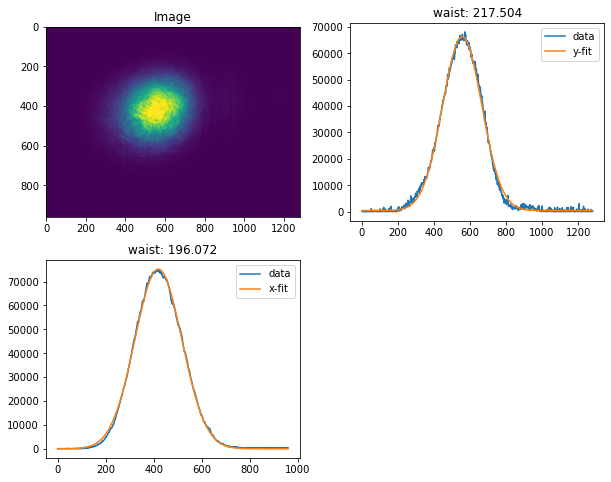

In [29]:
#Trying x and y separately
Ix = np.transpose(np.sum(data, axis=1))
Iy = np.transpose(np.sum(data, axis=0))

xparams, xcov = opt.curve_fit(gauss, x0, Ix,p0=[min(Ix),max(Ix),np.argmax(Ix),100])
fit_Ix = gauss(x0, *xparams)

yparams, ycov = opt.curve_fit(gauss, y0, Iy,p0=[min(Iy),max(Iy),np.argmax(Iy),100])
fit_Iy = gauss(y0, *yparams)

#Plot
fig = plt.figure(figsize = (10, 8))
plt.subplot(2,2,1)
plt.imshow(data)
plt.title('Image')

plt.subplot(2,2,3)
plt.plot(x0, Ix, label='data')
plt.plot(x0, fit_Ix, '-', label='x-fit')
plt.title('waist: '+str(2*round(xparams[3],3)))
plt.legend();

plt.subplot(2,2,2)
plt.plot(y0, Iy, label='data')
plt.plot(y0, fit_Iy, '-', label='y-fit')
plt.title('waist: '+str(2*round(yparams[3],3)))
plt.legend();
